In [ ]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
from ast import literal_eval
import folium
from collections import Counter

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

import math
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
import sklearn.metrics

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving hltv_playerStats-complete.csv to hltv_playerStats-complete.csv
User uploaded file "hltv_playerStats-complete.csv" with length 141117 bytes


In [ ]:
class CFG:
    dataset_name = 'hltv_playerStats-complete.csv'
    #models_path = '/Models/'

In [ ]:
df = pd.read_csv(CFG.dataset_name)
df.head(5)

,nick,country,stats_link,teams,maps_played,rounds_played,kd_difference,kd_ratio,rating,total_kills,headshot_percentage,total_deaths,grenade_damage_per_round,kills_per_round,assists_per_round,deaths_per_round,teammate_saved_per_round,saved_by_teammate_per_round,kast,impact
0,ZywOo,France,https://www.hltv.org//stats/players/11893/zywoo,"['Vitality', 'aAa']",970,25491,5917,1.38,1.27,21602,41.3,15685,3.6,0.85,0.13,0.62,0.10,0.12,74.9,1.45
1,s1mple,Ukraine,https://www.hltv.org//stats/players/7998/s1mple,['Natus Vincere'],1532,40464,8864,1.34,1.25,34647,41.3,25783,2.4,0.86,0.10,0.64,0.08,0.11,74.2,1.36
2,sh1ro,Russia,https://www.hltv.org//stats/players/16920/sh1ro,"['Gambit Youngsters', 'Gambit']",847,22465,5361,1.45,1.23,17320,27.9,11959,3.9,0.77,0.11,0.53,0.08,0.11,76.3,1.21
3,deko,Russia,https://www.hltv.org//stats/players/20113/deko,['1WIN'],378,10219,2225,1.37,1.22,8219,36.9,5994,3.3,0.80,0.10,0.59,0.09,0.11,74.5,1.21
4,Kaze,Malaysia,https://www.hltv.org//stats/players/8950/kaze,"['ViCi', 'Flash', 'MVP.karnal']",829,21617,4118,1.32,1.20,16957,30.3,12839,2.9,0.78,0.11,0.59,0.08,0.10,73.7,1.24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nick                         803 non-null    object 
 1   country                      803 non-null    object 
 2   stats_link                   803 non-null    object 
 3   teams                        803 non-null    object 
 4   maps_played                  803 non-null    int64  
 5   rounds_played                803 non-null    int64  
 6   kd_difference                803 non-null    int64  
 7   kd_ratio                     803 non-null    float64
 8   rating                       803 non-null    float64
 9   total_kills                  803 non-null    int64  
 10  headshot_percentage          803 non-null    float64
 11  total_deaths                 803 non-null    int64  
 12  grenade_damage_per_round     803 non-null    float64
 13  kills_per_round     

In [ ]:
df.describe()

,maps_played,rounds_played,kd_difference,kd_ratio,rating,total_kills,headshot_percentage,total_deaths,grenade_damage_per_round,kills_per_round,assists_per_round,deaths_per_round,teammate_saved_per_round,saved_by_teammate_per_round,kast,impact
count,803.000000,803.000000,803.000000,803.000000,803.00000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,833.174346,21893.596513,585.465753,1.035430,1.01188,15142.087173,45.462017,14556.518057,4.061395,0.688904,0.131046,0.666949,0.096015,0.096862,70.112827,1.054944
std,402.388811,10607.751477,1475.806605,0.092114,0.06656,7539.729631,8.416641,7018.031710,1.187467,0.044705,0.017702,0.030042,0.011236,0.013084,1.790944,0.100154
min,374.000000,9498.000000,-6238.000000,0.740000,0.77000,5530.000000,23.600000,5994.000000,1.400000,0.520000,0.080000,0.530000,0.040000,0.060000,63.300000,0.700000
25%,500.500000,13227.000000,-283.000000,0.980000,0.97000,9092.500000,40.500000,8842.500000,3.200000,0.660000,0.120000,0.650000,0.090000,0.090000,69.000000,0.990000
50%,734.000000,19174.000000,358.000000,1.030000,1.01000,13132.000000,47.300000,12603.000000,3.900000,0.690000,0.130000,0.670000,0.100000,0.100000,70.100000,1.060000
75%,1059.000000,27881.000000,1313.500000,1.090000,1.05000,19214.000000,51.450000,18226.500000,4.800000,0.720000,0.140000,0.690000,0.100000,0.110000,71.400000,1.120000
max,2169.000000,56914.000000,8864.000000,1.450000,1.27000,40884.000000,68.400000,38351.000000,9.100000,0.860000,0.180000,0.750000,0.140000,0.160000,76.300000,1.450000


In [ ]:
#Separating Numeric and Text Data
df_numeric = df.select_dtypes(include=[np.number])
df_categoric = df.select_dtypes(exclude=[np.number])

df_numeric_cols = list(df_numeric.columns)
df_categoric_cols = list(df_categoric.columns)

In [ ]:
#Interesting Stats in the Data
def maxAndMinStats(dataframe, cols):
    """Extracting out players with interesting statistics"""
    def maxAndMin(dataf, column):
        return dataf.loc[dataf[column].idxmax()], dataf.loc[dataf[column].idxmin()]
    
    maxMinList = []
    
    for col in cols:
        print('Column: ', col)
        res = maxAndMin(dataframe, col)
        max_, min_ = res
        print('Max in ', col, ': ', max_['nick'])
        print('Min in ', col, ': ', min_['nick'], '\n')
        
        maxMinList.append(res)
    
    return maxMinList

In [ ]:
maxMinStats = maxAndMinStats(df, df_numeric_cols)

'''So
s1mple has most kills per round. He is considered to be The Best Player in CSGO.
f0rest has most kills. He is regarded as the greatest player of Counter-Strike (1.6 and Global Offensive) as a whole. He is still performing in Tier 1 tournaments. He is a living proof that age might just be a number.
flusha has the most grenade damage per round. He is known for his 'interesting' plays and brilliant mind for CSGO in general.
sh1ro has lowest deaths per round which makes sense considering his role as an awper, reserved nature of his playstyle and slow play of his team.
bubble has most maps and rounds played. The 30 years old is still playing in SKADE with his Bulgarian colleagues in SKADE as of now.
b1t has the highest headshot percentage. He is the new headshot machine in the making if he keeps this statistic up for just some more time.
ZywOo has most impact and rating. He was and is still considered to be a contender for greatest player of CSGO in coming years if he manages to perform better.
TaZ has most deaths but do not let this figure distract you from the fact that he was part of the legendary Virtus.Pro lineup with pashaBiceps, Snax, Neo and byali. His deaths may indicate his sacrificial role in the team.'''

Column:  maps_played
Max in  maps_played :  bubble
Min in  maps_played :  DANK1NG 

Column:  rounds_played
Max in  rounds_played :  bubble
Min in  rounds_played :  FrostMisty 

Column:  kd_difference
Max in  kd_difference :  s1mple
Min in  kd_difference :  HUNDEN 

Column:  kd_ratio
Max in  kd_ratio :  sh1ro
Min in  kd_ratio :  RuFire 

Column:  rating
Max in  rating :  ZywOo
Min in  rating :  OCEAN 

Column:  total_kills
Max in  total_kills :  f0rest
Min in  total_kills :  OCEAN 

Column:  headshot_percentage
Max in  headshot_percentage :  b1t
Min in  headshot_percentage :  jdm64 

Column:  total_deaths
Max in  total_deaths :  TaZ
Min in  total_deaths :  deko 

Column:  grenade_damage_per_round
Max in  grenade_damage_per_round :  flusha
Min in  grenade_damage_per_round :  smike 

Column:  kills_per_round
Max in  kills_per_round :  s1mple
Min in  kills_per_round :  OCEAN 

Column:  assists_per_round
Max in  assists_per_round :  Texta
Min in  assists_per_round :  SENSEi 

Column:  death

"So\ns1mple has most kills per round. He is considered to be The Best Player in CSGO.\nf0rest has most kills. He is regarded as the greatest player of Counter-Strike (1.6 and Global Offensive) as a whole. He is still performing in Tier 1 tournaments. He is a living proof that age might just be a number.\nflusha has the most grenade damage per round. He is known for his 'interesting' plays and brilliant mind for CSGO in general.\nsh1ro has lowest deaths per round which makes sense considering his role as an awper, reserved nature of his playstyle and slow play of his team.\nbubble has most maps and rounds played. The 30 years old is still playing in SKADE with his Bulgarian colleagues in SKADE as of now.\nb1t has the highest headshot percentage. He is the new headshot machine in the making if he keeps this statistic up for just some more time.\nZywOo has most impact and rating. He was and is still considered to be a contender for greatest player of CSGO in coming years if he manages to 

In [ ]:
#Recent / Current Team
#The top-most team in the 'teams' column is the most recent (if the player is retired) or the current team of the player. Lets extract that team out.
def extractTopTeam(teams):
    return literal_eval(teams)[0]

In [ ]:
df['recent_team'] = np.vectorize(extractTopTeam)(df['teams'])

In [ ]:
#Lets split the data in categoric and numeric dataframes again.
df_numeric = df.select_dtypes(include=[np.number])
df_categoric = df.select_dtypes(exclude=[np.number])

df_numeric_cols = list(df_numeric.columns)
df_categoric_cols = list(df_categoric.columns)

In [ ]:
df_categoric.head(5)

,nick,country,stats_link,teams,recent_team
0,ZywOo,France,https://www.hltv.org//stats/players/11893/zywoo,"['Vitality', 'aAa']",Vitality
1,s1mple,Ukraine,https://www.hltv.org//stats/players/7998/s1mple,['Natus Vincere'],Natus Vincere
2,sh1ro,Russia,https://www.hltv.org//stats/players/16920/sh1ro,"['Gambit Youngsters', 'Gambit']",Gambit Youngsters
3,deko,Russia,https://www.hltv.org//stats/players/20113/deko,['1WIN'],1WIN
4,Kaze,Malaysia,https://www.hltv.org//stats/players/8950/kaze,"['ViCi', 'Flash', 'MVP.karnal']",ViCi


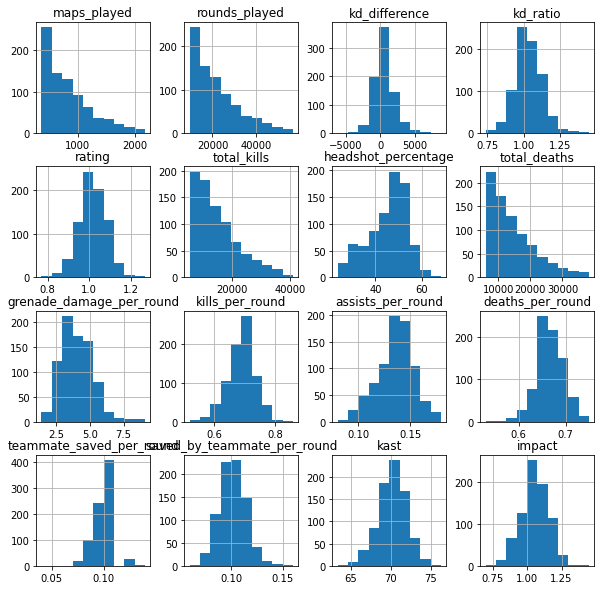

In [ ]:
#Histograms of all the numeric columns
df_numeric.hist(figsize=(10, 10));

In [ ]:
#Country Demographics
df_countrycounts = pd.DataFrame(df['country'].value_counts())
df_countrycounts['countries'] = df_countrycounts.index
df_countrycounts = df_countrycounts.reset_index(drop=True)
df_countrycounts.columns = ['counts', 'country']

df_countrycounts.sample(5)

,counts,country
32,5,South Africa
20,9,Spain
48,1,Montenegro
7,28,China
34,5,Belgium


In [ ]:
df_countrycounts.replace('United States', "United States of America", inplace = True)

In [ ]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

In [ ]:
m = folium.Map()
folium.Choropleth(
    geo_data=country_shapes,
    name='choropleth COVID-19',
    data=df_countrycounts,
    columns=['country', 'counts'],
    key_on='feature.properties.name',
    fill_color='PuRd',
    nan_fill_color='white'
).add_to(m)
m
#Countries with most players include USA, Denmark, Sweden, Poland, Brazil and Russia.

In [ ]:
#Analysis By Countries
#Before such analysis, I would like to remove those countries that have less than 5 players in the dataset.
to_remove_countries = list(df_countrycounts.loc[df_countrycounts['counts'] < 5]['country'])
df_c = df[~df['country'].isin(to_remove_countries)]
df_c_means = df_c.groupby('country').agg('mean')
df_c_means = df_c_means.reset_index()

In [ ]:
df_c_means.sample(5)

,country,maps_played,rounds_played,kd_difference,kd_ratio,rating,total_kills,headshot_percentage,total_deaths,grenade_damage_per_round,kills_per_round,assists_per_round,deaths_per_round,teammate_saved_per_round,saved_by_teammate_per_round,kast,impact
19,New Zealand,744.571429,19085.714286,1790.428571,1.141429,1.077143,13904.142857,37.385714,12113.714286,4.457143,0.725714,0.134286,0.640000,0.098571,0.100000,71.557143,1.154286
22,Portugal,779.125000,20389.750000,237.000000,1.016250,0.998750,13961.125000,45.062500,13724.125000,4.237500,0.680000,0.133750,0.672500,0.098750,0.101250,70.462500,1.068750
2,Belarus,714.666667,18926.222222,60.888889,0.990000,0.976667,12823.000000,48.188889,12761.777778,3.300000,0.668889,0.126667,0.676667,0.092222,0.093333,69.300000,1.006667
25,Serbia,715.700000,18767.900000,419.800000,1.027000,1.001000,12755.900000,43.780000,12336.100000,3.900000,0.681000,0.129000,0.661000,0.103000,0.106000,70.690000,1.032000
32,Ukraine,844.304348,22173.869565,380.782609,1.024348,0.996522,15183.826087,46.200000,14803.043478,3.795652,0.677826,0.128696,0.666087,0.090870,0.089565,69.443478,1.021304


In [ ]:
#In order keep my plots simple and less cluttered, I am only going to plot the bar chart for the top 10 countries that had most players.
to_plot_countries = list(df_countrycounts.head(11)['country'])
df_to_plot_countries = df_c_means[df_c_means['country'].isin(to_plot_countries)]
df_to_plot_countries

,country,maps_played,rounds_played,kd_difference,kd_ratio,rating,total_kills,headshot_percentage,total_deaths,grenade_damage_per_round,kills_per_round,assists_per_round,deaths_per_round,teammate_saved_per_round,saved_by_teammate_per_round,kast,impact
1,Australia,656.347826,16899.260870,643.891304,1.049348,1.024348,11841.369565,44.706522,11197.391304,4.413043,0.697174,0.135652,0.666739,0.096522,0.097174,70.330435,1.080000
4,Brazil,770.118644,20068.847458,888.915254,1.066949,1.031356,13972.677966,44.006780,13083.762712,4.242373,0.695763,0.132712,0.653390,0.094407,0.096102,71.108475,1.073051
7,China,693.285714,17936.714286,663.178571,1.049286,1.028929,12733.821429,47.978571,12070.642857,3.514286,0.708929,0.136071,0.676071,0.100000,0.099643,70.878571,1.087857
9,Denmark,945.013889,24905.805556,507.847222,1.026528,1.001944,16955.375000,45.854167,16447.555556,4.330556,0.676944,0.127500,0.660833,0.096944,0.097778,69.962500,1.036389
11,Finland,865.230769,22947.423077,489.576923,1.020000,1.000769,15730.884615,43.173077,15241.307692,4.673077,0.681538,0.135385,0.669231,0.094231,0.096154,69.757692,1.046923
12,France,1084.807692,28571.000000,912.807692,1.030769,1.007692,19797.423077,47.315385,18884.500000,3.830769,0.681538,0.129615,0.662308,0.096154,0.093846,69.907692,1.033462
13,Germany,1083.000000,28617.760000,27.360000,0.998000,0.985600,19256.880000,45.900000,19229.520000,4.276000,0.671600,0.130400,0.674000,0.096400,0.093200,69.120000,1.020800
21,Poland,1007.750000,26814.173077,308.115385,1.014423,0.997115,18362.711538,44.238462,18054.423077,4.217308,0.682308,0.131154,0.673269,0.091923,0.092308,69.392308,1.037115
24,Russia,850.250000,22538.656250,574.156250,1.038125,1.008750,15476.828125,45.309375,14902.656250,3.915625,0.684063,0.127344,0.663438,0.090781,0.091250,69.779687,1.050625
29,Sweden,1016.730769,26847.519231,672.807692,1.025962,1.003462,18537.942308,45.859615,17865.076923,4.400000,0.683462,0.134615,0.667115,0.092500,0.094615,69.571154,1.039038


'Some of the interesting facts from these countries are as belows:\nFrench and German players have played the most maps on average, with Sweden being third in this category.\nGerman players have very slightly lower figures when it comes to ratings and impacts.\nNote: While the statistics do show the average ratings, impacts etc. for the players, they are not the most accurate representation of strength of the players country-wise. The competition in Europe is a lot more tougher as compared to Asia and Australia. The European Country with most mediocre stats (Germany in this case) is still competitively ahead against the likes of China and Australia.'

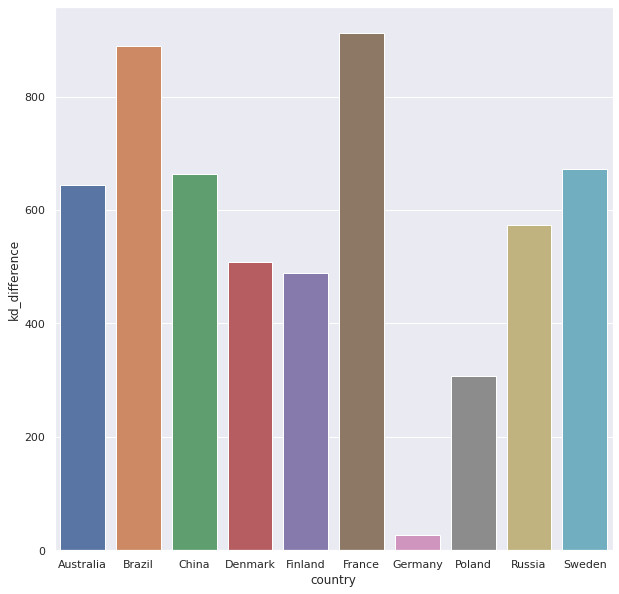

In [ ]:
sns.set(rc={'figure.figsize':(10, 10)})
sns.barplot(x='country', y='kd_difference', data=df_to_plot_countries);

'''Some of the interesting facts from these countries are as belows:
French and German players have played the most maps on average, with Sweden being third in this category.
German players have very slightly lower figures when it comes to ratings and impacts.
Note: While the statistics do show the average ratings, impacts etc. for the players, they are not the most accurate representation of strength of the players country-wise. The competition in Europe is a lot more tougher as compared to Asia and Australia. The European Country with most mediocre stats (Germany in this case) is still competitively ahead against the likes of China and Australia.'''

In [ ]:
#Player Nicks
sumNicks = df['nick'].sum()
onlyAlphas = ''.join(c for c in sumNicks if c.isalpha())
onlyNums = ''.join(c for c in sumNicks if c.isnumeric())

alphasDict = dict(Counter(onlyAlphas))
numsDict = dict(Counter(onlyNums))

maxAlpha = max(alphasDict, key=alphasDict.get)
maxNum = max(numsDict, key=numsDict.get)

In [ ]:
print("Most common alphabet in Player's nick: ", maxAlpha)
print("Most common number in Player's nick: ", maxNum)

Most common alphabet in Player's nick:  e
Most common number in Player's nick:  1


In [ ]:
#Correlation Matrix
#Before plotting the correlation matrix, I would like to move the rating column to the end (as it is going to be my target variable in model preparation).
rearrangement_cols = ['maps_played','rounds_played','kd_difference','kd_ratio','total_kills','headshot_percentage','total_deaths',
 'grenade_damage_per_round','kills_per_round','assists_per_round','deaths_per_round','teammate_saved_per_round','saved_by_teammate_per_round',
 'kast','impact', 'rating']
df_numeric = df_numeric[rearrangement_cols]

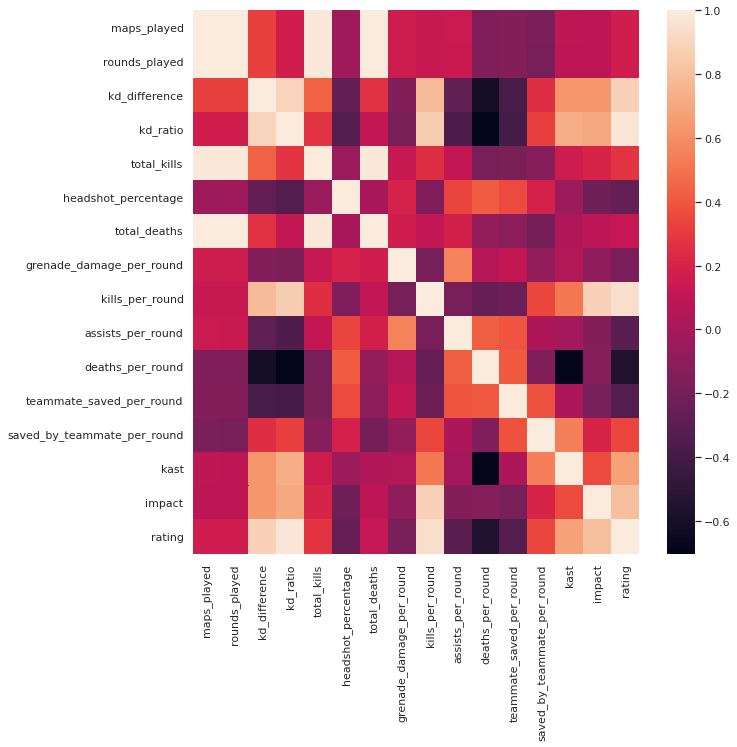

In [ ]:
sns.heatmap(df_numeric.corr());
#The correlation matrix shows that rating is heavily linked to Kill-Death ratio, Kill-Death Difference, Kills per Round, Deaths Per Round, KAST and Impact.

In [ ]:
#Scatter Matrix
numeric_cols = list(df_numeric.columns)
target_col = numeric_cols.pop()

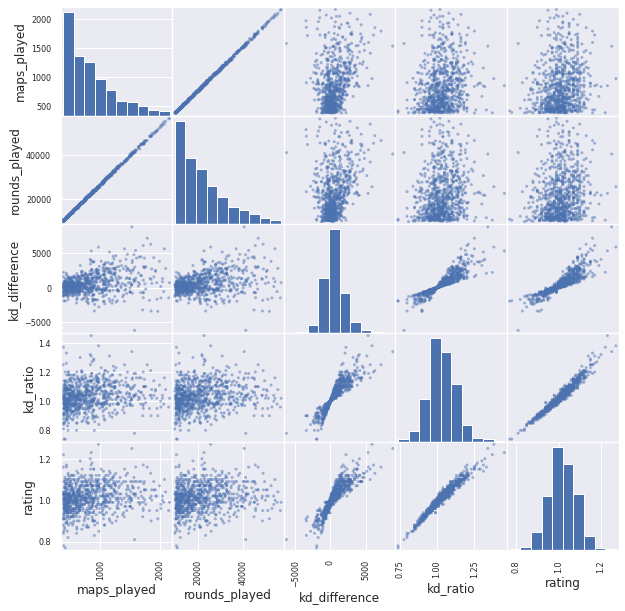

In [ ]:
cols_to_plot = numeric_cols[:4] + [target_col]
scatter_matrix(df[cols_to_plot]);

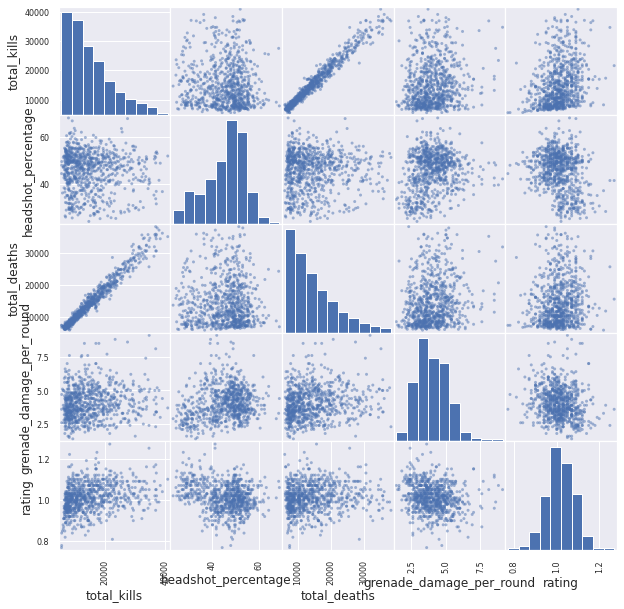

In [ ]:
cols_to_plot = numeric_cols[4:8] + [target_col]
scatter_matrix(df[cols_to_plot]);

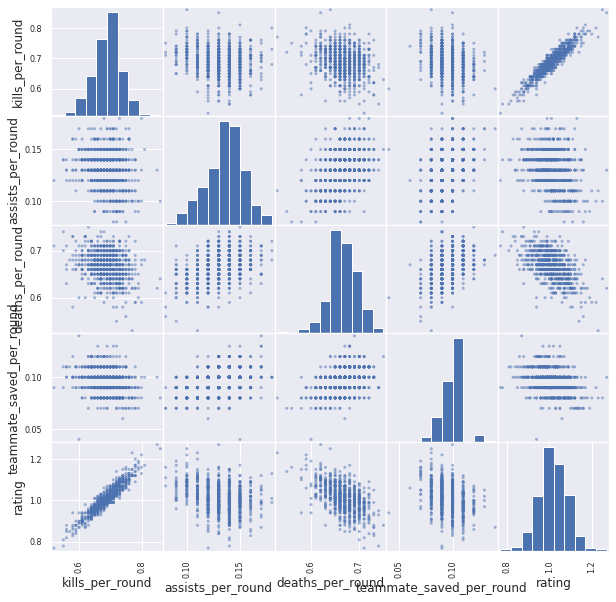

In [ ]:
cols_to_plot = numeric_cols[8:12] + [target_col]
scatter_matrix(df[cols_to_plot]);

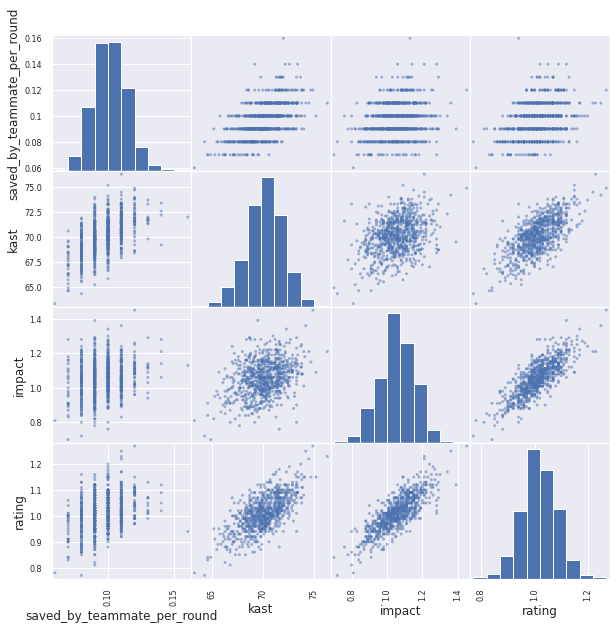

In [ ]:
cols_to_plot = numeric_cols[12:] + [target_col]
scatter_matrix(df[cols_to_plot]);
#From the scatter matrices, we can derive that: Impact, Kast, Deaths per round, KD-Difference and KD-Ratio are good indicators for rating of a player.

In [ ]:
#Model Preparation
#We will prepare a very simple Regression Model that can be used to predict the rating of the player.
#I will not be using any categorical data like Country, Recent Team etc. even though they can be incorporated in model preparation.
#I will also drop these columns in numerical data: maps_played, rounds_played, total_kills, total_deaths, saved_by_teammate_per_round. These columns are dropped because they had barely any correlation with rating as shown in the correlation matrix.
cols_to_drop = ['maps_played', 'rounds_played', 'total_kills', 'total_deaths', 'saved_by_teammate_per_round']
df_train = df_numeric.drop(columns = cols_to_drop)

In [ ]:
X, y = df_train.drop(columns = ['rating']), df_train['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
np.random.seed(0)

In [ ]:
#linear 
Linear = LinearRegression()
Linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Testing and Analysis
predictions1 = Linear.predict(X_test)
mean_squared_error(y_test, predictions1)

2.8162767072046624e-05

In [ ]:
mean_absolute_error(y_test, predictions1)

0.004307447067337135

In [ ]:
scores = cross_val_score(Linear, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
lin_scores = (-scores)
lin_scores.mean()

3.054767212552562e-05

In [ ]:
#lasso
Lasso = linear_model.Lasso(alpha=0.1)
Lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
#Testing and Analysis
predictions1 = Lasso.predict(X_test)
mean_squared_error(y_test, predictions1)

0.004300763104549654

In [ ]:
mean_absolute_error(y_test, predictions1)

0.051278613029933674

In [ ]:
scores = cross_val_score(Lasso, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
Lasso_scores = (-scores)
Lasso_scores.mean()

0.004468122030998764

In [ ]:
# Use grid search to tune the parameters:

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

lasso_reg = linear_model.Lasso()
grid_search = GridSearchCV(lasso_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=4)
grid_search.fit(X_train, y_train)

negative_mse = grid_search.best_score_
mse = (-negative_mse)
mse

Fitting 5 folds for each of 7 candidates, totalling 35 fits


3.634618557511874e-05

In [ ]:
#ridge
Ri = Ridge(alpha=1.0)
Ri.fit(X_train, y_train)

Ridge()

In [ ]:
#Testing and Analysis
predictions1 = Ri.predict(X_test)
mean_squared_error(y_test, predictions1)

2.8166538825160093e-05

In [ ]:
mean_absolute_error(y_test, predictions1)

0.004312081765523685

In [ ]:
scores = cross_val_score(Ri, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
Ri_scores = (-scores)
Ri_scores.mean()

3.059114661104975e-05

In [ ]:
# Use grid search to tune the parameters:

param_grid = {'alpha': (np.logspace(-8, 8, 100))}

ridge_reg = Ridge()
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=4)
grid_search.fit(X_train, y_train)

negative_mse = grid_search.best_score_
mse = (-negative_mse)
mse

Fitting 5 folds for each of 100 candidates, totalling 500 fits


3.054631394541729e-05

In [ ]:
#elastic
Elastic = ElasticNet(random_state=0)
Elastic.fit(X_train, y_train)

ElasticNet(random_state=0)

In [ ]:
#Testing and Analysis
predictions1 = Elastic.predict(X_test)
mean_squared_error(y_test, predictions1)

0.004300763104549654

In [ ]:
mean_absolute_error(y_test, predictions1)

0.051278613029933674

In [ ]:
scores = cross_val_score(Elastic, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
Elastic_scores = (-scores)
Elastic_scores.mean()

0.004468122030998764

In [ ]:
# Use grid search to tune the parameters:

param_grid = {"max_iter": [1, 5, 10],
                      "alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                      "l1_ratio": [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

Elastic_reg = ElasticNet()
grid_search = GridSearchCV(Elastic_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=4)
grid_search.fit(X_train, y_train)

negative_mse = grid_search.best_score_
mse = (-negative_mse)
mse

Fitting 5 folds for each of 231 candidates, totalling 1155 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.004e-02, tolerance: 2.861e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


4.0673003095036856e-05

In [ ]:
#svr
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

SVR()

In [ ]:
#Testing and Analysis
predictions1 = svr.predict(X_test)
mean_squared_error(y_test, predictions1)

0.0021243201816483776

In [ ]:
mean_absolute_error(y_test, predictions1)

0.03751606103521649

In [ ]:
scores = cross_val_score(svr, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
svr_scores = (-scores)
svr_scores.mean()

0.0021756403647212887

In [ ]:
#tuning svr
param_grid = [{'kernel': ['linear'], 'C':[0.5,1,5,10,30]},
              {'kernel':['rbf'], 'C':[5,10,15,20], 'gamma':[0.5,1.0,1.5,2.0]},
             ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=4)
grid_search.fit(X_train, y_train)

negative_mse = grid_search.best_score_
mse = (-negative_mse)
mse

Fitting 5 folds for each of 21 candidates, totalling 105 fits


0.0008622969078230182

In [ ]:
grid_search.best_params_ 

{'C': 0.5, 'kernel': 'linear'}

In [ ]:
#random forest regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
#Testing and Analysis
predictions1 = rf.predict(X_test)
mean_squared_error(y_test, predictions1)

6.817403726708003e-05

In [ ]:
mean_absolute_error(y_test, predictions1)

0.005335403726708094

In [ ]:
scores = cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rf_scores = (-scores)
rf_scores.mean()

7.262889365310042e-05

In [ ]:
#tune
param_grid = [{'bootstrap':[False,True],'n_estimators':[75,100,125,150,200], 'max_features':[1,2,4,6]}]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(X_train, y_train)
negative_mse = grid_search.best_score_
mse = (-negative_mse)
mse

6.416811635658967e-05

In [ ]:
grid_search.best_params_ 

{'bootstrap': True, 'max_features': 6, 'n_estimators': 125}

Overall it can be seen that Linear regression would be the best option here as it has the lowest MSE score